
#Exercise 1.


In [ ]:
!pip install deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 10.5 MB/s eta 0:00:00


In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch

In [ ]:
if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.FloatTensor)

In [2]:
import numpy as np

In [3]:

from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [4]:
from scipy.integrate import solve_ivp

In [5]:
def f(t,y):
  return y**2-y**3



In [4]:
f(2,2)

-4

In [5]:
delta=0.02


In [6]:
def time_interval(delta,time_steps):
  t_span=[0,(2/delta)]
  t_eval=np.linspace(0,(2/delta),time_steps)
  return t_span, t_eval


In [7]:
def ODEsolve(delta, t_span, t_eval,rtol,atol):
  y0=[delta]
  #t_span=[0,2/delta]
  #t_eval=np.linspace(0,2/delta,100)
  sol= solve_ivp(f,t_span=t_span,y0=y0,t_eval=t_eval,dense_output=True,atol=atol,rtol=rtol)
  return sol


In [8]:
delta=0.02
t_span1,t_eval1=time_interval(delta,200)
sol_1=ODEsolve(delta,t_span1,t_eval1,0.00001,0.000001)

delta=0.0001
t_span2,t_eval2=time_interval(delta,100)
sol_2=ODEsolve(delta,t_span2,t_eval2,0.00001,0.0000001)



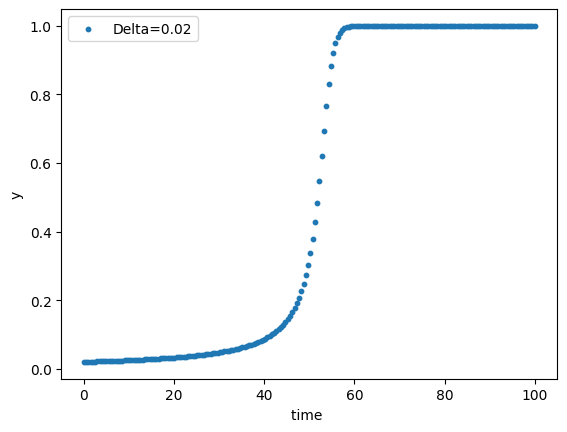

In [9]:
plt.scatter(t_eval1,sol_1.y,s=10, label='Delta=0.02')

#plt.scatter(t_eval2,sol_2.y,s=10,label='Delta=0.0001')
plt.xlabel('time ')  # Adding a title to the x-axis
plt.ylabel('y')  # Adding a title to the y-axis
plt.legend()
plt.show()

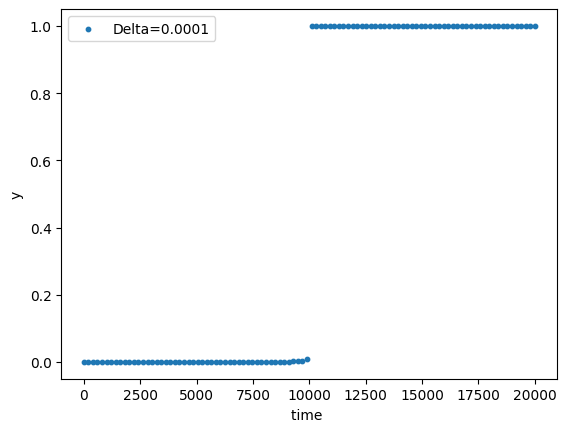

In [10]:

plt.scatter(t_eval2,sol_2.y,s=10,label='Delta=0.0001')
plt.xlabel('time ')  # Adding a title to the x-axis
plt.ylabel('y')  # Adding a title to the y-axis
plt.legend()
plt.show()

Runge-Kutta

Order 2.

In [11]:
def rk2(y,h):
  k1 =f(0, y) #h*f(0, y)
  k2 =f(0,y+0.5*h*k1)
  #y = y + k2
  return k1, k2

In [12]:
def rk3(y,k1, k2,h):
  k3=f(0,y+(3/4)*h*k2)
  y_3=h*((2/9)*k1+(1/3)*k2+(4/9)*k3)
  return k3,y_3

In [ ]:
def Rk_twostage(delta,time_steps):

  #delta=  0.02
  # Two stage explicit Runge-Kutta
  #time_steps=200
  x = 0
  y =delta
  x_values = []
  y_values = []
  #error=[]
  h=(2/delta)/time_steps
  for i in range(time_steps):
    y_star=y+0.5*h*f(0,y)
    y_next=y+h*f(0,y_star)
    y=y_next
    x=x+h
    x_values.append(x)
    y_values.append(y)
  return x_values,y_values

In [ ]:
x_values,y_values=Rk_twostage(0.02,200)

In [ ]:
delta=0.02
time_steps=200
t_span1,t_eval1=time_interval(delta,time_steps)
sol_1=ODEsolve(delta,t_span1,t_eval1,0.001,0.00000001)

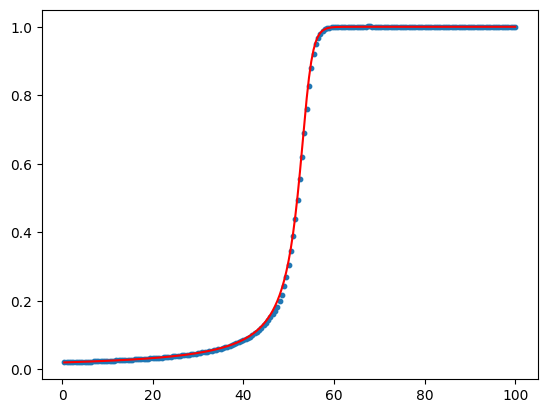

In [ ]:
plt.plot(x_values,y_values, color='r',label='Runge-Kutta two-stage')
plt.scatter(x_values, sol_1.y,s=10, label='Scipy solve_ivp')

In [13]:
# Runge-Kutta embedded method 3 order with 2 order embedded
def Rk_emb23(delta,time_steps):
  t = 0
  y = delta
  t_values = []
  y2_values = []
  y3_values = []
  aeps=[]
  reps=[]
  error=[]
  h=(2/delta)/time_steps
  end_point=2/delta
  print('endpoint 2/delta:', end_point)
  print('step size:', h)
  while t<end_point:
    k1,k2= rk2(y,h)
    k3, y_new=rk3(y,k1,k2,h)
    y3=y+y_new # Third order
    k4=f(0,y3)
    y2 = y + (7/24)*h*k1+(1/4)*h*k2+(1/3)*h*k3+(1/8)*h*k4 # Second order
    t = t + h
    err_abs=np.abs(y3-y2) # abslute error
    err_rel=err_abs/max(np.abs(y3), 1e-6) # relative error
    err=err_abs+err_rel
    error.append(err)
    aeps.append(err_abs)
    reps.append(err_rel)
    t_values.append(t)
    y2_values.append(y2)
    y3_values.append(y3)
    y=y3

  global_err=np.sum(error) # The sum of the error abs+rel
  mean_error=np.array(error).mean()
  return t_values,y2_values,y3_values, error, global_err,aeps, reps,mean_error


In [14]:
t_values,y2_values,y3_values, error, global_err,aeps,reps,mean_error=Rk_emb23(0.02,200)

endpoint 2/delta: 100.0
step size: 0.5


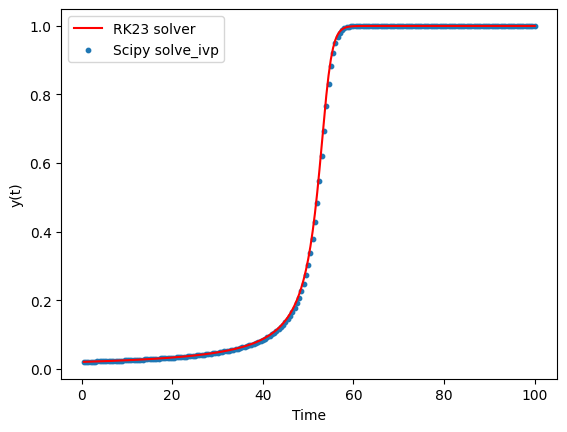

In [15]:
plt.plot(t_values,y3_values, color='r',label='RK23 solver')
plt.scatter(t_values, sol_1.y,s=10, label='Scipy solve_ivp')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

In [16]:
t_values,y2_values,y3_values, error, global_err,aeps,reps,mean_error=Rk_emb23(0.0001,100000)

endpoint 2/delta: 20000.0
step size: 0.2


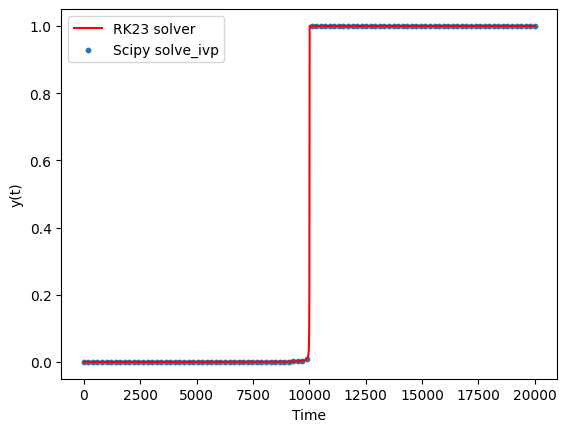

In [17]:
plt.plot(t_values,y3_values, color='r',label='RK23 solver')
plt.scatter(t_eval2,sol_2.y,s=10,label='Scipy solve_ivp')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.show()



In [23]:
mean_error

4.0806936399628525e-09

In [24]:
global_err
#0.002410408222690716 200

0.00040806936399628526

In [25]:
def step_size(time_steps):
  return (2/delta)/time_steps

In [34]:
#time_steps=[50,75,100,125,150,175,200,225] # for delta=0.02
#time_steps=[10000,20000,30000,40000,50000] # for delta=0.0001
time_steps=[50000,60000,70000,80000,90000] # for delta=0.0001


In [ ]:
test=map(step_size,time_steps)

In [ ]:
list(test)

[0.002,
 0.0016666666666666668,
 0.0014285714285714286,
 0.00125,
 0.0011111111111111111]

In [ ]:
1e-4

0.0001

In [38]:
#global_err =[Rk_emb23(0.02, t)[4] for t in time_steps] # 4 is global error, 5 reps, 6 reps
#errors =[Rk_emb23(0.02, t)[-1] for t in time_steps] # 4 is global error, 5 reps, 6 reps
global_err =[Rk_emb23(0.0001, t)[4] for t in time_steps] # 4 is global error, 5 reps, 6 reps
errors =[Rk_emb23(0.0001, t)[-1] for t in time_steps] # 4 is global error, 5 reps, 6 reps


endpoint 2/delta: 20000.0
step size: 0.4
endpoint 2/delta: 20000.0
step size: 0.3333333333333333
endpoint 2/delta: 20000.0
step size: 0.2857142857142857
endpoint 2/delta: 20000.0
step size: 0.25
endpoint 2/delta: 20000.0
step size: 0.2222222222222222
endpoint 2/delta: 20000.0
step size: 0.4
endpoint 2/delta: 20000.0
step size: 0.3333333333333333
endpoint 2/delta: 20000.0
step size: 0.2857142857142857
endpoint 2/delta: 20000.0
step size: 0.25
endpoint 2/delta: 20000.0
step size: 0.2222222222222222


In [28]:
errors

[0.001024935867849323,
 0.00021996763590867888,
 8.278900124921432e-05,
 4.492961413828061e-05,
 2.7143838143636276e-05,
 1.7634616297380534e-05,
 1.205204111345358e-05,
 8.506881341469768e-06]

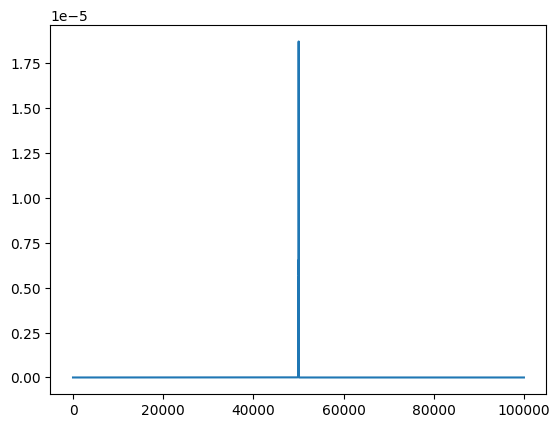

In [29]:
plt.plot(error)
plt.show()

In [1]:
plt.plot(time_steps,errors)
plt.axhline(y=1e-4, color='r', linestyle='--', label='y=1e-4')
plt.xlabel('Time Steps (resolution)')
plt.ylabel('Mean error')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [36]:
t_values,y2_values,y3_values, error, global_err,aeps,reps,mean_error=Rk_emb23(0.0001,80000)

endpoint 2/delta: 20000.0
step size: 0.25


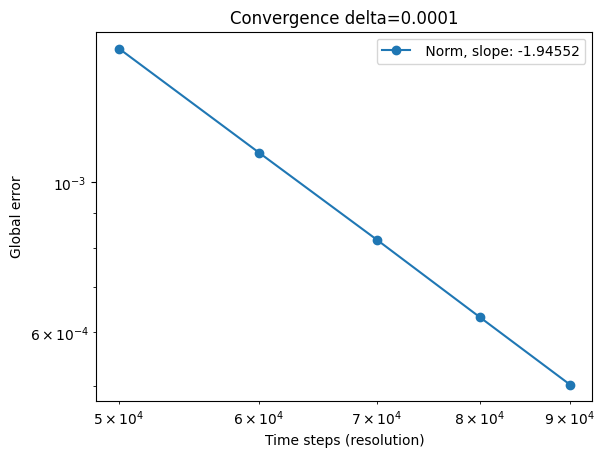

In [39]:
# order of convergence

slope = np.polyfit(np.log(time_steps), np.log(global_err), 1)[0]
plt.loglog(time_steps, global_err, "o-", label=f" Norm, slope: {slope:.5f}")
plt.xlabel('Time steps (resolution)')
plt.ylabel('Global error')
plt.title('Convergence delta=0.0001')
plt.legend()
plt.show()

In [ ]:
2/delta/200

0.5

In [20]:
# Runge-Kutta embedded methode 3 order with 2 order
def Rk_emb23_adaptive(delta,time_steps,tol):
  t = 0
  y = delta
  t_values = []
  y2_values = []
  y3_values = []
  error=[]
  h=(2/delta)/time_steps
  end_point=2/delta

  while t<end_point:
    k1,k2= rk2(y,h)
    k3, y_new=rk3(y,k1,k2,h)
    y3=y+y_new # Third order
    k4=f(0,y3)
    y2 = y + (7/24)*h*k1+(1/4)*h*k2+(1/3)*h*k3+(1/8)*h*k4 # Second order
    #t = t + h
    err_abs=np.abs(y3-y2)
    maxerr=tol*(1+err_abs) # Mix of relative error and absolute error
    err=err_abs
    if err<maxerr:
      error.append(err)

      t_values.append(t+h)
      t=t+h
      y2_values.append(y2)
      y3_values.append(y3)
      y=y3
    q = 0.8*(maxerr/err)**(1/3)
    q=min(q,4.0)
    h = min(q*h,end_point-t)

  global_err=np.sum(error)
  return t_values,y2_values,y3_values, error, global_err


In [45]:
t_values,y2_values,y3_values, error, global_err=Rk_emb23_adaptive(0.0001,100000,0.00001)

In [46]:
len(t_values)

4037

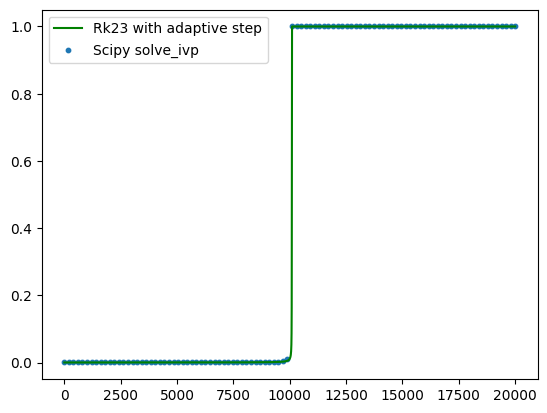

In [47]:
#plt.plot(t_values,y2_values, color='r',label='Runge-Kutta 2nd order')
plt.plot(t_values,y3_values, color='g',label='Rk23 with adaptive step')
plt.scatter(t_eval2, sol_2.y,s=10, label='Scipy solve_ivp')
plt.legend()

In [56]:
t_values,y2_values,y3_values, error, global_err=Rk_emb23_adaptive(0.02,200,0.001)

In [57]:
len(t_values)

36

In [58]:
len(y3_values)

36

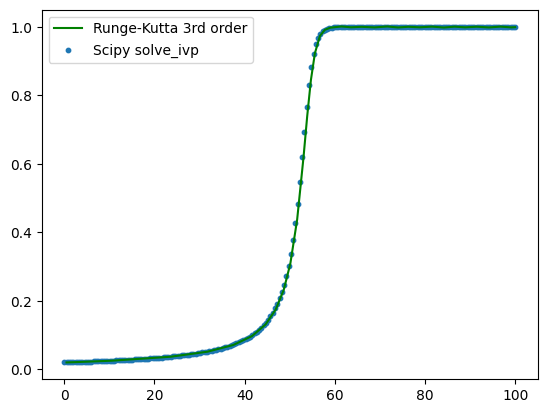

In [59]:
#plt.plot(t_values,y2_values, color='r',label='Runge-Kutta 2nd order')
plt.plot(t_values,y3_values, color='g',label='Runge-Kutta 3rd order')
plt.scatter(t_eval1, sol_1.y,s=10, label='Scipy solve_ivp')
plt.legend()

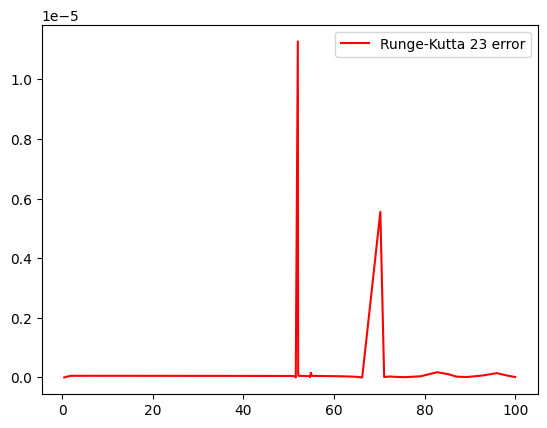

In [57]:

plt.plot(t_values,error, color='r',label='Runge-Kutta 23 error')
#plt.scatter(t_eval, sol.y, label='Scipy solve_ivp')
plt.legend()

In [58]:
Global_error=np.sum(error)

In [59]:
print('Global_error', Global_error)
# Global_error 0.002410408222690716 ved 200

Global_error 3.4447393818620026e-05


Order 3.

# Exercise 2.

In [ ]:
from functools import partial

In [ ]:
#epsilon=0.1

alpha=np.array([1,4,16])
a=np.ones(3)
b=np.zeros(3)

In [ ]:
b

array([0., 0., 0.])

In [ ]:
def u(x,t):
  u_new=0.0
  for i in range(3):
    u_new +=np.exp(-epsilon*alpha[i]*t)*(a[i]*np.cos(alpha[i]*x)+b[i]*np.sin(alpha[i]*x))
  return u_new

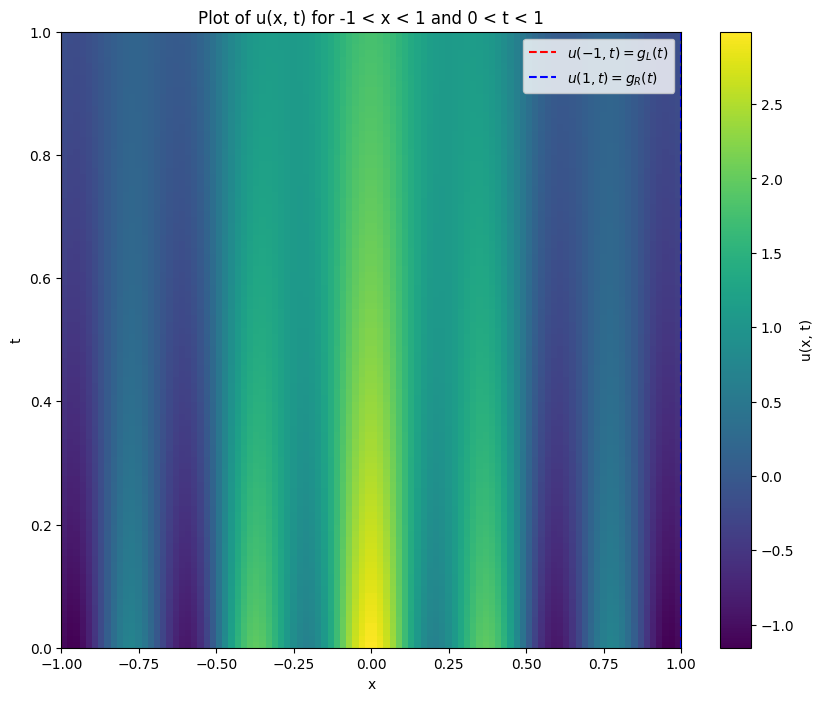

In [ ]:
# Define functions for Dirichlet boundary conditions g_L(t) and g_R(t)
def g_L(t):
    return np.sin(t)

def g_R(t):
    return np.cos(t)

# Define the range for x and t
x_values = np.linspace(-1, 1, 100)
t_values = np.linspace(0, 1, 100)

# Plot the main function u(x, t) using imshow
X, T = np.meshgrid(x_values, t_values)
Z = u(X, T)
plt.figure(figsize=(10, 8))
plt.imshow(Z, extent=[-1, 1, 0, 1], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='u(x, t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Plot of u(x, t) for -1 < x < 1 and 0 < t < 1')

# Plot Dirichlet boundary conditions g_L(t) and g_R(t)
t_boundary_values = np.linspace(0, 1, 100)
plt.plot([-1]*100, t_boundary_values, 'r--',label='$u(-1, t) = g_L(t)$')
plt.plot([1]*100, t_boundary_values, 'b--', label='$u(1, t) = g_R(t)$')

plt.legend()
plt.show()

In [ ]:
u(-2,0)

0.27257649015075425

In [ ]:
u_initial=partial(u,t=0) # initial conditions

In [ ]:
u_initial(-2)

0.27257649015075425

In [ ]:
u_bound_left=partial(u,x=-1)

In [ ]:
u_bound_right=partial(u,x=1)

In [ ]:
u(-1,1)

-0.14261279312945802

In [ ]:
u_bound_left(t=1)

-0.14261279312945802

In [ ]:
# params for x
N=20
h=2/N

In [ ]:
u_initial(-1)

-1.0710007953188567

In [ ]:
# vend det om
h=0.1
N=2/h

In [ ]:
N

20.0

In [ ]:
# params for t
M=20
k=1/1000

In [ ]:
M

2000

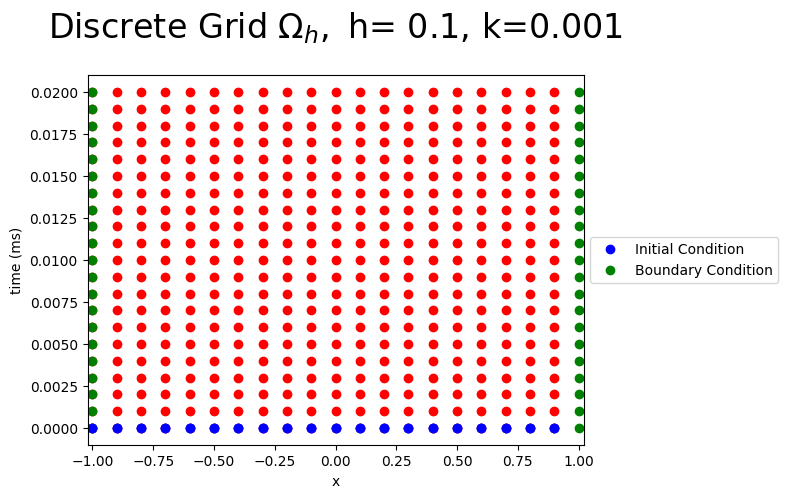

In [ ]:
#Nt=1000
time_steps=M
time=np.arange(0,(time_steps+1)*k,k)
#time=np.arange(0,time_steps,k)
x=np.arange(-1,1,h)
X, Y = np.meshgrid(x, time)
fig = plt.figure()
plt.plot(X,Y,'ro');
plt.plot(x,0*x,'bo',label='Initial Condition');
#plt.plot(np.ones(time_steps+1),time,'go',label='Boundary Condition');
plt.plot(-1*np.ones(time_steps+1),time,'go',label='Boundary Condition');
plt.plot(np.ones(time_steps+1),time,'go');
plt.plot(x,0*x,'bo');
#plt.plot(0*time,time,'go');
plt.xlim((-1.02,1.02))
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h= %s, k=%s'%(h,k),fontsize=24,y=1.08)
plt.show();

In [ ]:
r=(epsilon*k)/h**2

#A=diags([[r], [(1-2*r)], [r]], [-1, 0, 1],
                     shape=(9,9))

In [ ]:
r

0.09999999999999998

In [ ]:

(1-2*r)

0.8

In [ ]:
A.toarray()

array([[0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0.8, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.8, 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0.8, 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0.8, 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.8, 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.8, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.8]])

In [ ]:
def f(x):
  return 2*x

In [ ]:
v=np.arange(0,(2+0.5),0.5)
g=[f(l) for l in v]


In [ ]:
v

array([0. , 0.5, 1. , 1.5, 2. ])

In [ ]:
g

[0.0, 1.0, 2.0, 3.0, 4.0]

In [ ]:
k

0.001

In [ ]:
M

20

In [ ]:
# t endpoint
endp=1
# Resolution
M=1000
# step size
k=endp/M

In [ ]:
def init_u(x):
    if 0 <= x <= 0.5:
        U = 2 * x
    elif 0.5 <= x <= 1:
        U = 2 * (1 - x)
    else:
        # Handle cases outside the specified range
        raise ValueError("x should be between 0 and 1 inclusive.")
    return U


In [ ]:
init_u(0.6)

0.8

In [ ]:
def r_value(epsilon,k,h):
  return (epsilon*k)/h**2

In [ ]:
epsilon=0.0099
# x
N=100
h=2/N
# t
k=0.001
M=1000

In [ ]:
r_value(epsilon,k,h)

0.024750000000000005

In [ ]:
# (x,t)

# t>0
#g_l=[u_bound_left(t=y) for y in t]

# Initial condition -1<= x <=1
x=np.arange(-1,(1+2/N),2/N)
#x=np.arange(0,(1+2/N),2/N)
u_start=[u_initial(x=v) for v in x]
#u_start=[init_u(x=v) for v in x]

r=(epsilon*k)/h**2
u=np.zeros((int(M+1),x.shape[0]))
print('u shape',u.shape)

u[0,:]=u_start
i=0
for i in range(M):  # time dim
    for j in range(1, u.shape[1] - 1):  # x dim
        u[i+1, j] = r*u[i, j-1] + (1-2*r)*u[i, j] + r*u[i, j+1]
    #u[i+1, 0] = 0.0
    #u[i+1, -1] = 0.0
    u[i+1,0]=u_bound_left(t=(0+i*k))
    u[i+1,-1]=u_bound_right(t=(0+i*k))




u shape (1001, 101)


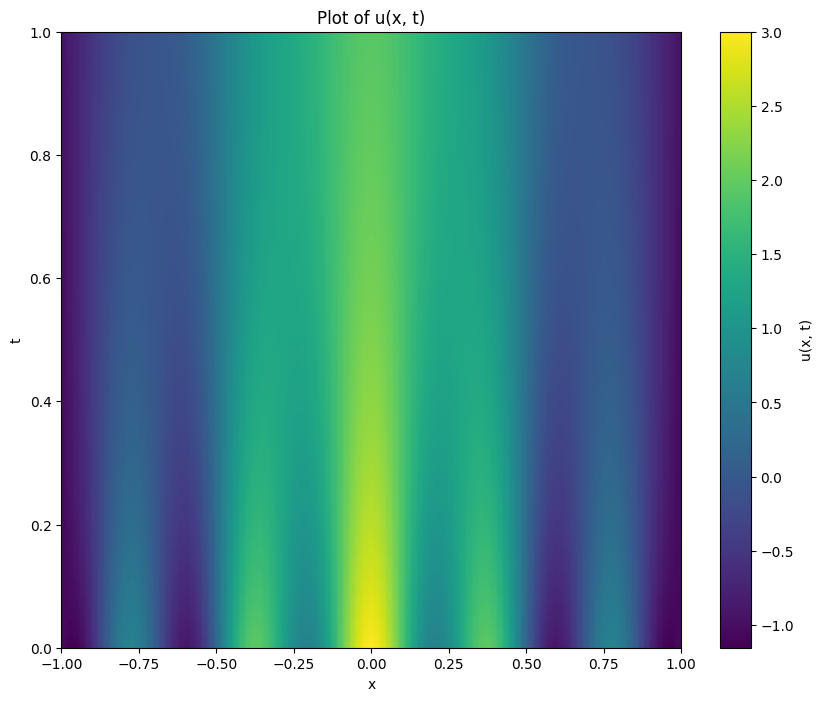

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your code snippet goes here...

# Plot the solution u using imshow
plt.figure(figsize=(10, 8))
plt.imshow(u, extent=[-1, 1, 0, 1], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='u(x, t)')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Plot of u(x, t)')

plt.show()


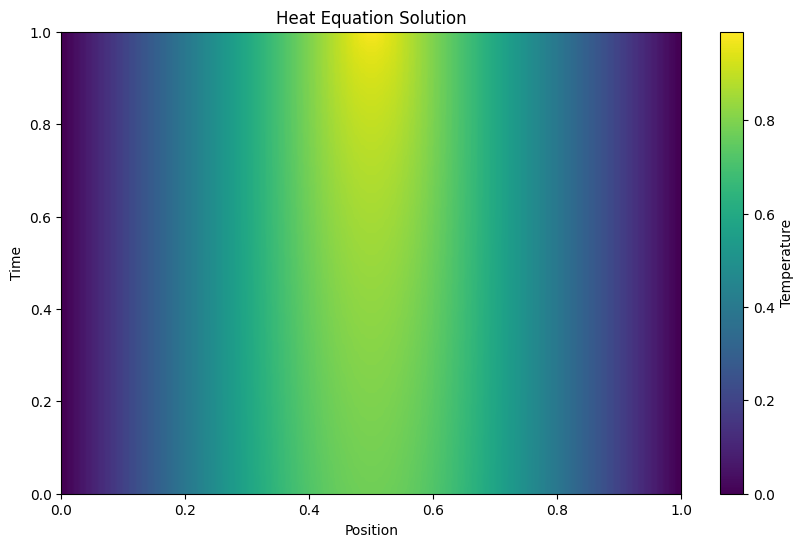

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.0  # Length of the rod
T = 1  # Total time
nx = 100  # Number of spatial grid points
nt = 1000  # Number of time steps
dx = L / (nx - 1)
dt = T / nt
alpha = 0.01  # Thermal diffusivity

# Initial condition
def initial_condition(x):
    if 0 <= x <= 0.5:
        return 2 * x
    elif 0.5 <= x <= 1:
        return 2 * (1 - x)

# Boundary conditions
def boundary_condition(x, t):
    if x == 0 or x == L:
        return 0

# Forward Time, Centered Space method
def forward_time_centered_space():
    u = np.zeros((nt, nx))

    # Set initial condition
    for i in range(nx):
        u[0][i] = initial_condition(i * dx)

    for n in range(1, nt):
        for i in range(1, nx - 1):
            u[n][i] = u[n-1][i] + alpha * dt / dx**2 * (u[n-1][i+1] - 2*u[n-1][i] + u[n-1][i-1])

        # Boundary conditions
        u[n][0] = boundary_condition(0, n*dt)
        u[n][-1] = boundary_condition(L, n*dt)

    return u

# Solve the equation
u = forward_time_centered_space()

# Plot the solution
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)

X, T = np.meshgrid(x, t)

#fig = plt.figure(figsize=(10, 6))
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X, T, u, cmap='viridis')
#ax.set_xlabel('Position')
#ax.set_ylabel('Time')
#ax.set_zlabel('Temperature')
#ax.set_title('Heat Equation Solution')
#plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(u, aspect='auto', extent=[0, L, 0,1], cmap='viridis')
plt.colorbar(label='Temperature')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('Heat Equation Solution')
plt.show()

#Exercise 5.

In [ ]:
import deepxde as dde
from deepxde.backend import pytorch

In [ ]:
geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 0.99)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [ ]:
# with epsilon=0.01/pi
def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    return dy_t + y * dy_x - 0.01 / np.pi * dy_xx

In [ ]:
bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial)

In [ ]:
data = dde.data.TimePDE(geomtime, pde, [bc, ic],
                        num_domain=2540, num_boundary=80, num_initial=160)

In [ ]:
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")

In [ ]:
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

Compiling model...
Building feed-forward neural network...
'build' took 0.071862 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.757954 s



In [ ]:
losshistory, train_state = model.train(iterations=15000)

Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.26e-01, 7.14e-02, 4.89e-01]    [2.26e-01, 7.14e-02, 4.89e-01]    []  
1000      [4.23e-02, 1.20e-03, 5.79e-02]    [4.23e-02, 1.20e-03, 5.79e-02]    []  
2000      [3.25e-02, 1.26e-04, 4.83e-02]    [3.25e-02, 1.26e-04, 4.83e-02]    []  
3000      [2.55e-02, 2.87e-05, 3.78e-02]    [2.55e-02, 2.87e-05, 3.78e-02]    []  
4000      [5.07e-03, 2.51e-05, 4.81e-03]    [5.07e-03, 2.51e-05, 4.81e-03]    []  
5000      [3.01e-03, 2.12e-05, 2.80e-03]    [3.01e-03, 2.12e-05, 2.80e-03]    []  
6000      [2.07e-03, 1.51e-05, 1.83e-03]    [2.07e-03, 1.51e-05, 1.83e-03]    []  
7000      [1.44e-03, 1.04e-05, 1.22e-03]    [1.44e-03, 1.04e-05, 1.22e-03]    []  
8000      [1.08e-03, 7.77e-06, 8.25e-04]    [1.08e-03, 7.77e-06, 8.25e-04]    []  
9000      [8.90e-04, 6.03e-06, 6.74e-04]    [8.90e-04, 6.03e-06, 6.74e-04]    []  
10000     [7.65e-04, 5.24e-06, 5.89e-04]    [7.65e-04, 5.24e-

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


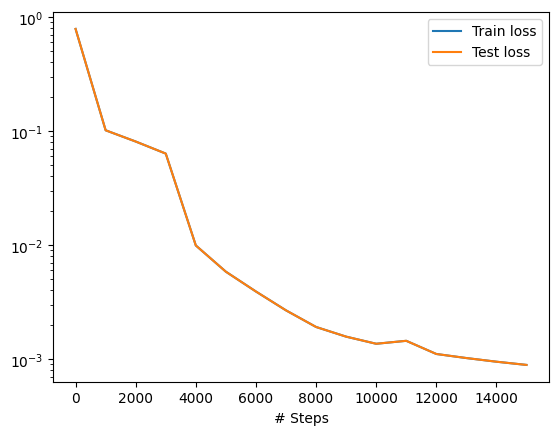

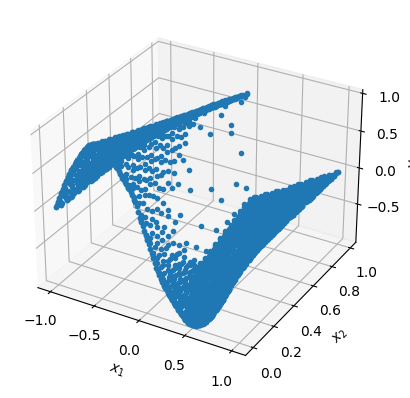

In [ ]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [ ]:
A=np.array([[-1, 1], [3,-2]])

In [ ]:
A

array([[-1,  1],
       [ 3, -2]])

In [ ]:
from numpy import linalg as LA

In [ ]:
LA.norm(A, np.inf)

5.0

In [ ]:
LA.norm(A,ord=1)

4.0